## 1. Import Libraries

In [28]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import random_zoom
from tensorflow.keras.utils import load_img,array_to_img
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

## 2. Loading Dataset

In [29]:
base_dir = "C:\\Users\Reah\Desktop\image_trashnet"

## Each image is of (512,396)px dimension which is later reduced to (224,224)

## 3. Splitting the images in train test split in ratio of 8:1:1 

In [30]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [31]:
import splitfolders
splitfolders.ratio(base_dir, output="data", seed=1337, ratio=(0.8, 0.1,0.1))

Copying files: 2152 files [00:01, 2031.78 files/s]


In [32]:
train_sub_dirs = os.listdir('data/train')
random = np.random.RandomState(42)

## 4. Visualising Dataset

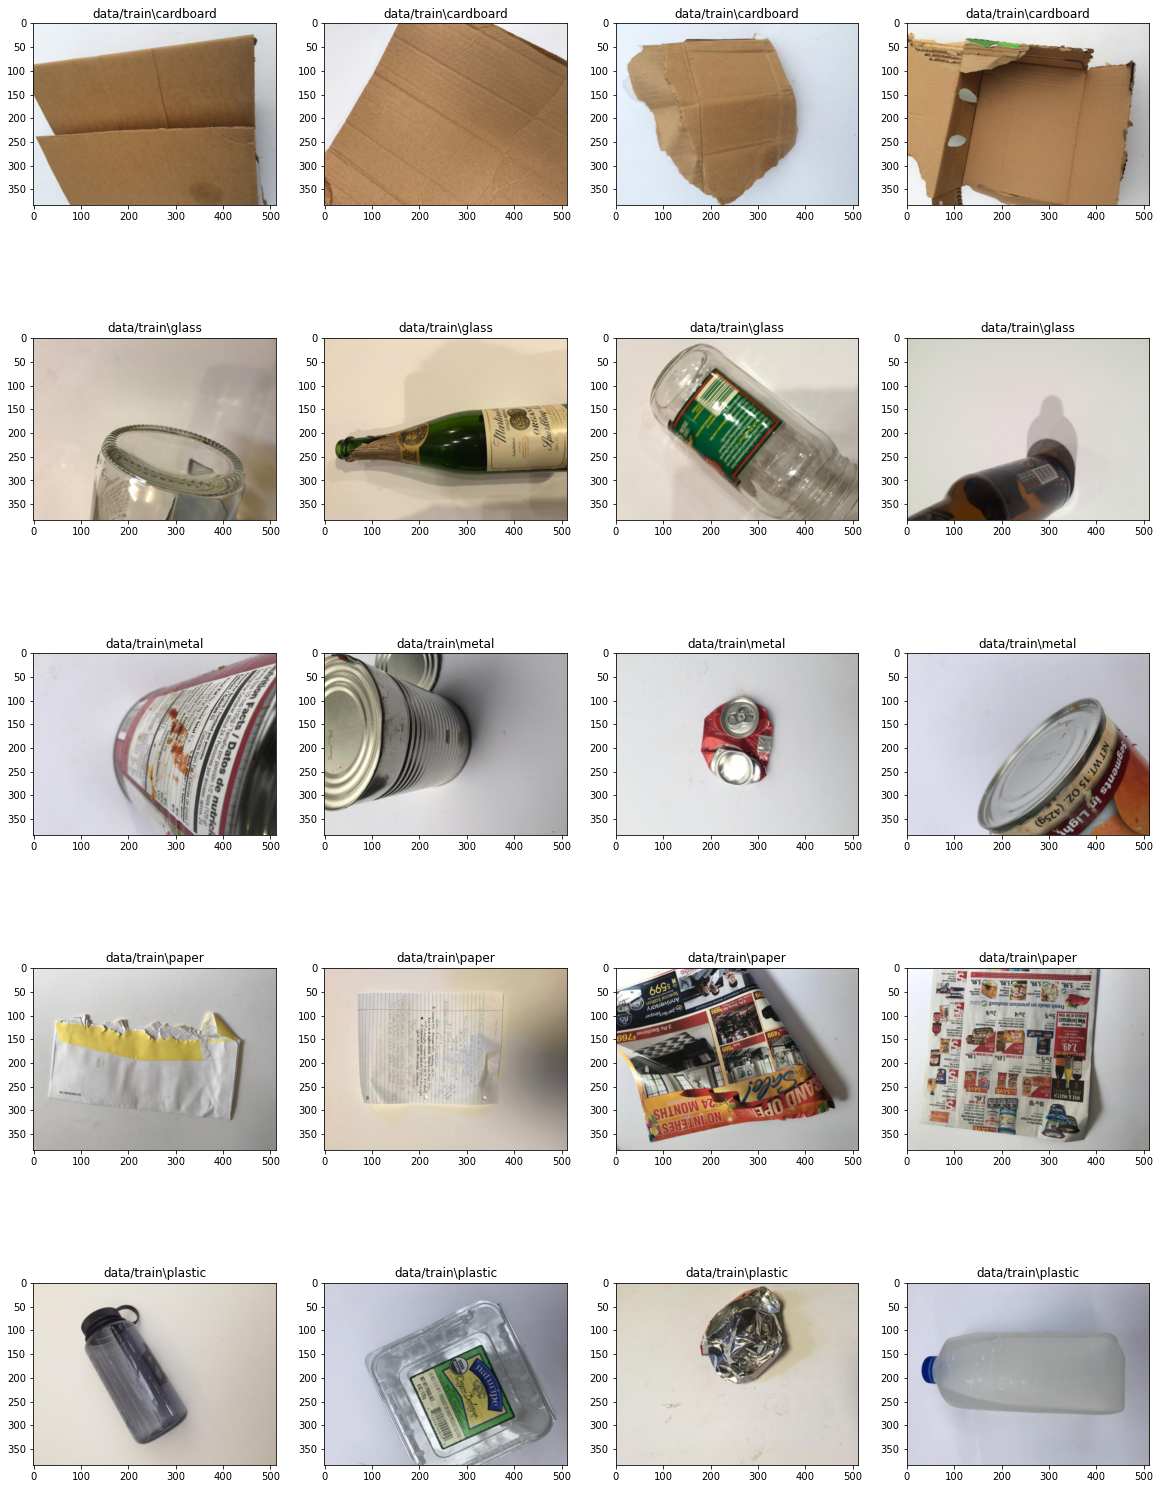

In [33]:
nrows = 5
ncols = 4

count = 1

plt.figure(figsize=(nrows*4, ncols*7))

for i in range(nrows):
    p = os.path.join('data/train', train_sub_dirs[i])
    imgs = os.listdir(p)
    for i in range(ncols):
        img_path = os.path.join(p, random.choice(imgs))
        img = mpimg.imread(img_path)
        plt.subplot(nrows, ncols, count)
        plt.title(p)
        plt.imshow(img)
        count += 1

plt.show()

## 5. Preprocessing and augmentation

In [34]:
view_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="constant",
)

view_generator = view_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=1
)

Found 2152 images belonging to 3 classes.


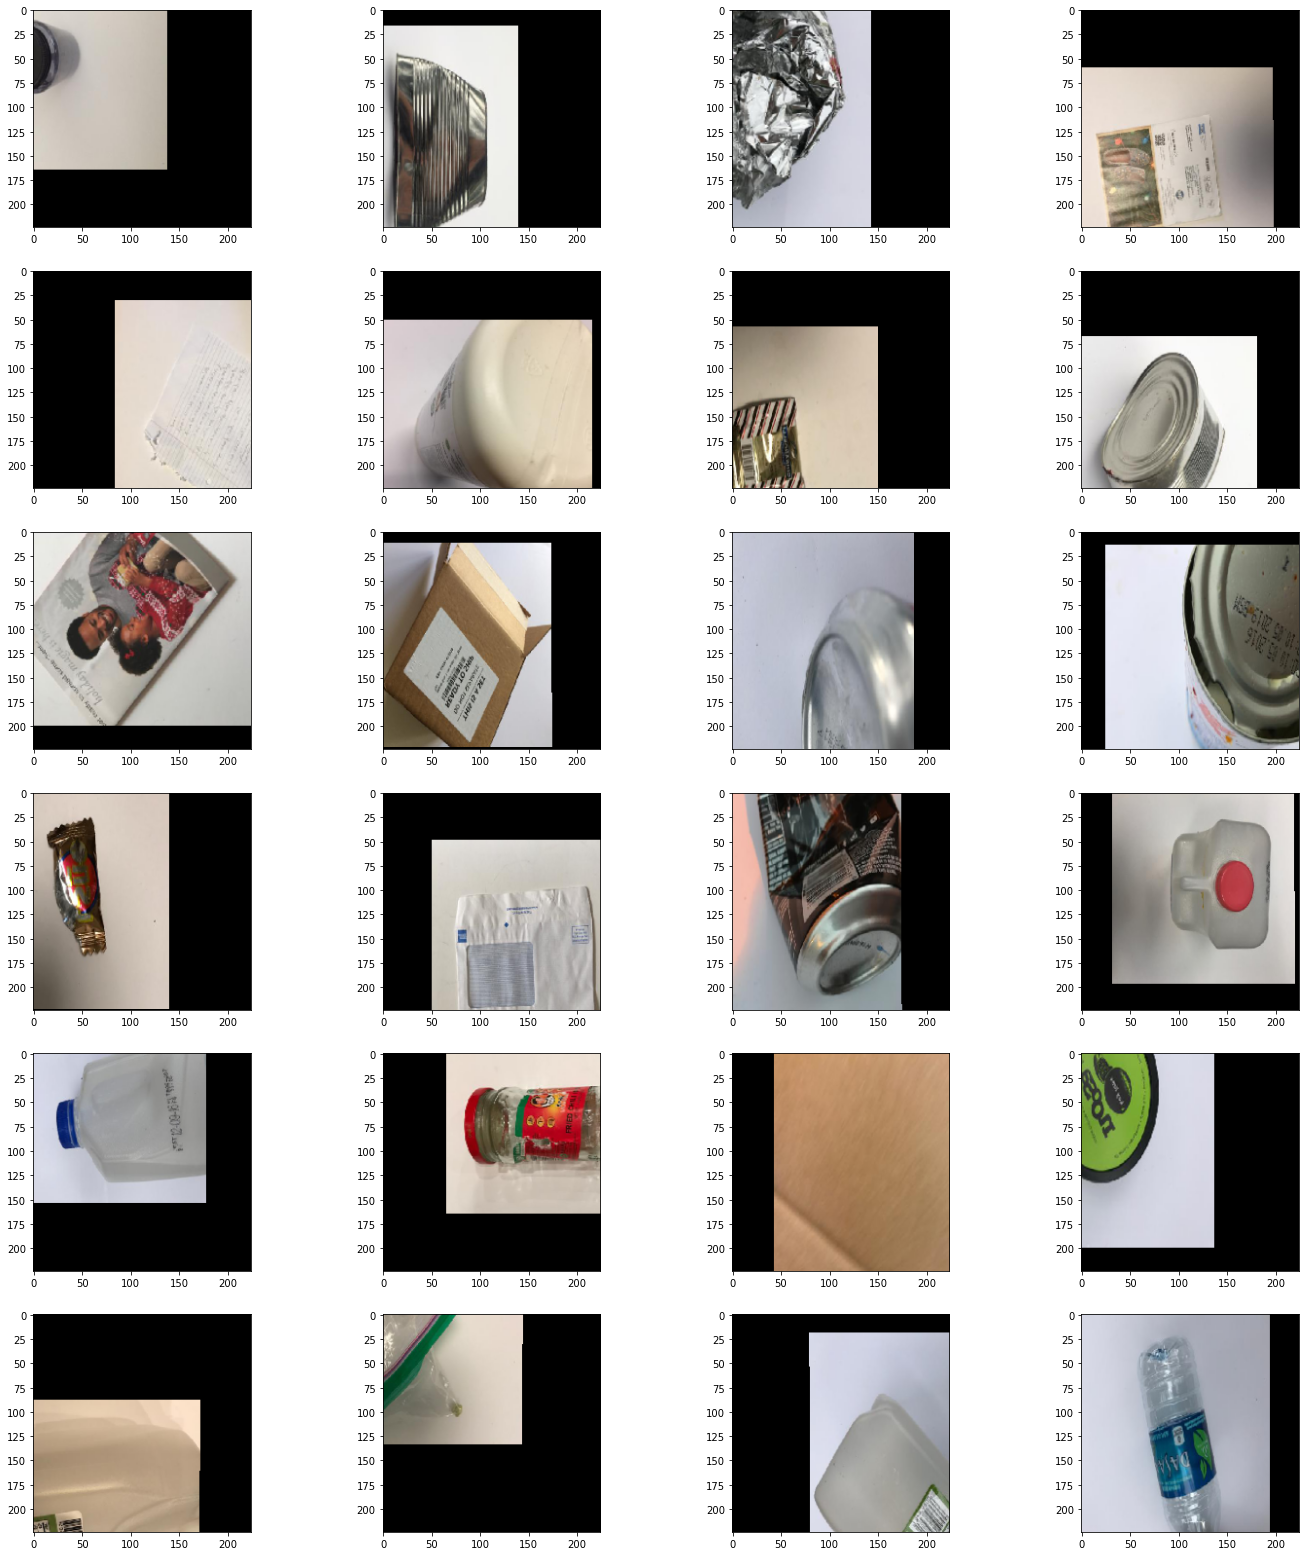

In [35]:
nrows = 6
ncols = 4

count = 1

plt.figure(figsize=(nrows*4, ncols*7))

for batch in view_generator:
    img = batch[0].reshape((224, 224,3))
    plt.subplot(nrows, ncols, count)
    plt.imshow(img, cmap="gray")
    count += 1
    if count > (nrows * ncols):
        break
plt.show()

## 6. Creating training and testing data

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224),
    class_mode="sparse",
    color_mode="rgb",
    batch_size=20
)

test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(224, 224),
    class_mode="sparse",
    color_mode="rgb",
    batch_size=20
)

valid_generator = test_datagen.flow_from_directory(
    'data/val',
    target_size=(224, 224),
    class_mode="sparse",
    color_mode="rgb",
    batch_size=20
)

Found 1719 images belonging to 6 classes.
Found 220 images belonging to 6 classes.
Found 213 images belonging to 6 classes.


## 7. Building a CNN Model and Compile it

In [41]:
model = Sequential([
    Conv2D(128, kernel_size=(5, 5), strides=1, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(3, 3), strides=2, padding="same"),
    
    Conv2D(64, kernel_size=(2, 2), strides=1, activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
  
    Conv2D(32, kernel_size=(2, 2), strides=1, activation="relu"),
    MaxPool2D(pool_size=(2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(32, activation="relu"),
    Dropout(rate=0.15),
    Dense(6, activation="softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 110, 110, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 64)      32832     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 54, 54, 32)        8224      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 27, 27, 32)      

In [42]:
model.compile(optimizer="rmsprop", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=["acc"])

## 8. Fit and Test Model

In [43]:
%%time
history=model.fit(
    train_generator,
    epochs=70,
    steps_per_epoch=25,
    validation_data=valid_generator,
    validation_steps=10,
    shuffle=1,
    verbose=1
)

Epoch 1/70
25/25 [==============================] - 7s 245ms/step - loss: 2.2025 - acc: 0.1964 - val_loss: 1.7773 - val_acc: 0.2450
Epoch 2/70
25/25 [==============================] - 6s 222ms/step - loss: 1.7884 - acc: 0.2040 - val_loss: 1.7964 - val_acc: 0.2050
Epoch 3/70
25/25 [==============================] - 5s 213ms/step - loss: 1.8044 - acc: 0.1860 - val_loss: 1.7712 - val_acc: 0.1900
Epoch 4/70
25/25 [==============================] - 5s 216ms/step - loss: 1.7731 - acc: 0.2080 - val_loss: 1.7515 - val_acc: 0.1750
Epoch 5/70
25/25 [==============================] - 5s 216ms/step - loss: 1.7734 - acc: 0.1960 - val_loss: 1.7434 - val_acc: 0.2050
Epoch 6/70
25/25 [==============================] - 5s 215ms/step - loss: 1.7921 - acc: 0.2020 - val_loss: 1.7125 - val_acc: 0.3300
Epoch 7/70
25/25 [==============================] - 6s 217ms/step - loss: 1.7811 - acc: 0.2480 - val_loss: 1.7125 - val_acc: 0.3100
Epoch 8/70
25/25 [==============================] - 6s 221ms/step - loss: 1.

In [44]:
import shutil
model.save("model7")

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


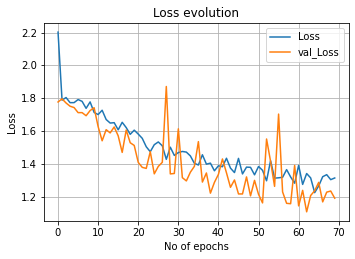

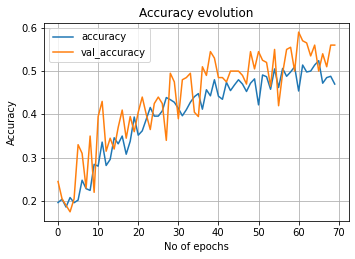

In [45]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy')
plt.show()

In [46]:
model.evaluate(test_generator)

11/11 [==============================] - 1s 46ms/step - loss: 1.1967 - acc: 0.5045


[1.196733832359314, 0.5045454502105713]

1/1 [==============================] - 0s 277ms/step
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
2


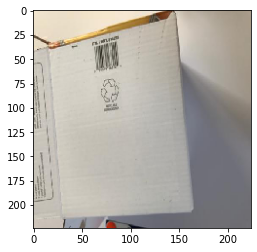

In [47]:
img = tf.keras.utils.load_img(r'data\test\cardboard\cardboard54.jpg', target_size = (224, 224))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis = 0)
pred_class=model.predict(img)
print(os.listdir(r'data\test'))
print(np.argmax(pred_class))

In [48]:
pred = model.predict(test_generator)
pred_classes = [np.argmax(p) for p in pred]
y_test = test_generator.classes

11/11 [==============================] - 1s 45ms/step


In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22        41
           1       0.24      0.32      0.27        41
           2       0.14      0.15      0.14        41
           3       0.18      0.17      0.18        41
           4       0.00      0.00      0.00        41
           5       0.09      0.13      0.11        15

    accuracy                           0.17       220
   macro avg       0.15      0.16      0.15       220
weighted avg       0.15      0.17      0.16       220

